In [3]:
import ctypes
import numpy as np


# Les environnement secret 

In [4]:
import ctypes
import numpy as np

lib_path = 'secret_envs.dll'

class SecretEnv0Wrapper:
    def __init__(self):
        self.lib = ctypes.cdll.LoadLibrary(lib_path)

        # MDP functions
        self.lib.secret_env_0_num_states.argtypes = []
        self.lib.secret_env_0_num_states.restype = ctypes.c_size_t

        self.lib.secret_env_0_num_actions.argtypes = []
        self.lib.secret_env_0_num_actions.restype = ctypes.c_size_t

        self.lib.secret_env_0_num_rewards.argtypes = []
        self.lib.secret_env_0_num_rewards.restype = ctypes.c_size_t

        self.lib.secret_env_0_reward.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_0_reward.restype = ctypes.c_float

        self.lib.secret_env_0_transition_probability.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_0_transition_probability.restype = ctypes.c_float

        # Monte Carlo and TD Methods
        self.lib.secret_env_0_new.argtypes = []
        self.lib.secret_env_0_new.restype = ctypes.c_void_p

        self.lib.secret_env_0_reset.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_reset.restype = None

        self.lib.secret_env_0_display.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_display.restype = None

        self.lib.secret_env_0_state_id.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_state_id.restype = ctypes.c_size_t

        self.lib.secret_env_0_is_forbidden.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_0_is_forbidden.restype = ctypes.c_bool

        self.lib.secret_env_0_is_game_over.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_is_game_over.restype = ctypes.c_bool

        self.lib.secret_env_0_available_actions.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_available_actions.restype = ctypes.POINTER(ctypes.c_size_t)

        self.lib.secret_env_0_available_actions_len.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_available_actions_len.restype = ctypes.c_size_t

        self.lib.secret_env_0_available_actions_delete.argtypes = [ctypes.POINTER(ctypes.c_size_t), ctypes.c_size_t]
        self.lib.secret_env_0_available_actions_delete.restype = None

        self.lib.secret_env_0_step.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_0_step.restype = None

        self.lib.secret_env_0_score.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_score.restype = ctypes.c_float

        self.lib.secret_env_0_delete.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_0_delete.restype = None

        self.lib.secret_env_0_from_random_state.argtypes = []
        self.lib.secret_env_0_from_random_state.restype = ctypes.c_void_p

class SecretEnv0:
    def __init__(self, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = SecretEnv0Wrapper()
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.lib.secret_env_0_new()
        self.instance = instance

    def __del__(self):
        if self.wrapper is not None:
            self.wrapper.lib.secret_env_0_delete(self.instance)

    # Méthodes liées au MDP
    def num_states(self) -> int:
        return self.wrapper.lib.secret_env_0_num_states()

    def num_actions(self) -> int:
        return self.wrapper.lib.secret_env_0_num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.lib.secret_env_0_num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.lib.secret_env_0_reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.lib.secret_env_0_transition_probability(s, a, s_p, r_index)
    def get_transition_probabilities(self):
        P = {}
        for s in range(self.num_states()):
            P[s] = {}
            for a in range(self.num_actions()):
              P[s][a] = []
              for s_p in range(self.num_states()):
                for r in range(self.num_rewards()):
                    proba = self.p(s, a, s_p, r)
                    if proba > 0:
                        reward = self.reward(s, a, s_p)
                        done = s_p == self.num_states() - 1
                        P[s][a].append((proba, s_p, reward, done))
        return P


    # Méthodes liées à Monte Carlo et TD
    def state_id(self) -> int:
        return self.wrapper.lib.secret_env_0_state_id(self.instance)

    def reset(self):
        self.wrapper.lib.secret_env_0_reset(self.instance)

    def display(self):
        self.wrapper.lib.secret_env_0_display(self.instance)

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.lib.secret_env_0_is_forbidden(self.instance, action)

    def is_game_over(self) -> bool:
        return self.wrapper.lib.secret_env_0_is_game_over(self.instance)

    def available_actions(self) -> np.ndarray:
        actions_len = self.wrapper.lib.secret_env_0_available_actions_len(self.instance)
        actions_pointer = self.wrapper.lib.secret_env_0_available_actions(self.instance)
        arr = np.ctypeslib.as_array(actions_pointer, (actions_len,))
        arr_copy = np.copy(arr)
        self.wrapper.lib.secret_env_0_available_actions_delete(actions_pointer, actions_len)
        return arr_copy

    def step(self, action: int):
        self.wrapper.lib.secret_env_0_step(self.instance, action)

    def score(self):
        return self.wrapper.lib.secret_env_0_score(self.instance)

    @staticmethod
    def from_random_state() -> 'SecretEnv0':
        wrapper = SecretEnv0Wrapper()
        instance = wrapper.lib.secret_env_0_from_random_state()
        return SecretEnv0(wrapper, instance)


In [5]:
class SecretEnv1Wrapper:
    def __init__(self):
        self.lib = ctypes.cdll.LoadLibrary(lib_path)

        # MDP functions
        self.lib.secret_env_1_num_states.argtypes = []
        self.lib.secret_env_1_num_states.restype = ctypes.c_size_t

        self.lib.secret_env_1_num_actions.argtypes = []
        self.lib.secret_env_1_num_actions.restype = ctypes.c_size_t

        self.lib.secret_env_1_num_rewards.argtypes = []
        self.lib.secret_env_1_num_rewards.restype = ctypes.c_size_t

        self.lib.secret_env_1_reward.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_1_reward.restype = ctypes.c_float

        self.lib.secret_env_1_transition_probability.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_1_transition_probability.restype = ctypes.c_float

        # Monte Carlo and TD Methods
        self.lib.secret_env_1_new.argtypes = []
        self.lib.secret_env_1_new.restype = ctypes.c_void_p

        self.lib.secret_env_1_reset.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_reset.restype = None

        self.lib.secret_env_1_display.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_display.restype = None

        self.lib.secret_env_1_state_id.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_state_id.restype = ctypes.c_size_t

        self.lib.secret_env_1_is_forbidden.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_1_is_forbidden.restype = ctypes.c_bool

        self.lib.secret_env_1_is_game_over.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_is_game_over.restype = ctypes.c_bool

        self.lib.secret_env_1_available_actions.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_available_actions.restype = ctypes.POINTER(ctypes.c_size_t)

        self.lib.secret_env_1_available_actions_len.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_available_actions_len.restype = ctypes.c_size_t

        self.lib.secret_env_1_available_actions_delete.argtypes = [ctypes.POINTER(ctypes.c_size_t), ctypes.c_size_t]
        self.lib.secret_env_1_available_actions_delete.restype = None

        self.lib.secret_env_1_step.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_1_step.restype = None

        self.lib.secret_env_1_score.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_score.restype = ctypes.c_float

        self.lib.secret_env_1_delete.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_1_delete.restype = None

        self.lib.secret_env_1_from_random_state.argtypes = []
        self.lib.secret_env_1_from_random_state.restype = ctypes.c_void_p

class SecretEnv1:
    def __init__(self, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = SecretEnv1Wrapper()
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.lib.secret_env_1_new()
        self.instance = instance

    def __del__(self):
        if self.wrapper is not None:
            self.wrapper.lib.secret_env_1_delete(self.instance)

    # Méthodes liées au MDP
    def num_states(self) -> int:
        return self.wrapper.lib.secret_env_1_num_states()

    def num_actions(self) -> int:
        return self.wrapper.lib.secret_env_1_num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.lib.secret_env_1_num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.lib.secret_env_1_reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.lib.secret_env_1_transition_probability(s, a, s_p, r_index)

    # Méthodes liées à Monte Carlo et TD
    def state_id(self) -> int:
        return self.wrapper.lib.secret_env_1_state_id(self.instance)

    def reset(self):
        self.wrapper.lib.secret_env_1_reset(self.instance)

    def display(self):
        self.wrapper.lib.secret_env_1_display(self.instance)

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.lib.secret_env_1_is_forbidden(self.instance, action)

    def is_game_over(self) -> bool:
        return self.wrapper.lib.secret_env_1_is_game_over(self.instance)

    def available_actions(self) -> np.ndarray:
        actions_len = self.wrapper.lib.secret_env_1_available_actions_len(self.instance)
        actions_pointer = self.wrapper.lib.secret_env_1_available_actions(self.instance)
        arr = np.ctypeslib.as_array(actions_pointer, (actions_len,))
        arr_copy = np.copy(arr)
        self.wrapper.lib.secret_env_1_available_actions_delete(actions_pointer, actions_len)
        return arr_copy

    def step(self, action: int):
        self.wrapper.lib.secret_env_1_step(self.instance, action)

    def score(self):
        return self.wrapper.lib.secret_env_1_score(self.instance)

    @staticmethod
    def from_random_state() -> 'SecretEnv1':
        wrapper = SecretEnv1Wrapper()
        instance = wrapper.lib.secret_env_1_from_random_state()
        return SecretEnv1(wrapper, instance)
    
    def get_transition_probabilities(self):
        P = {}
        for s in range(self.num_states()):
            P[s] = {}
            for a in range(self.num_actions()):
              P[s][a] = []
              for s_p in range(self.num_states()):
                for r in range(self.num_rewards()):
                    proba = self.p(s, a, s_p, r)
                    if proba > 0:
                        reward = self.reward(s, a, s_p)
                        done = s_p == self.num_states() - 1
                        P[s][a].append((proba, s_p, reward, done))
        return P

In [6]:
import ctypes
import numpy as np

lib_path = 'secret_envs.dll'

class SecretEnv2Wrapper:
    def __init__(self):
        self.lib = ctypes.cdll.LoadLibrary(lib_path)

        # MDP functions
        self.lib.secret_env_2_num_states.argtypes = []
        self.lib.secret_env_2_num_states.restype = ctypes.c_size_t

        self.lib.secret_env_2_num_actions.argtypes = []
        self.lib.secret_env_2_num_actions.restype = ctypes.c_size_t

        self.lib.secret_env_2_num_rewards.argtypes = []
        self.lib.secret_env_2_num_rewards.restype = ctypes.c_size_t

        self.lib.secret_env_2_reward.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_2_reward.restype = ctypes.c_float

        self.lib.secret_env_2_transition_probability.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_2_transition_probability.restype = ctypes.c_float

        # Monte Carlo and TD Methods
        self.lib.secret_env_2_new.argtypes = []
        self.lib.secret_env_2_new.restype = ctypes.c_void_p

        self.lib.secret_env_2_reset.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_reset.restype = None

        self.lib.secret_env_2_display.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_display.restype = None

        self.lib.secret_env_2_state_id.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_state_id.restype = ctypes.c_size_t

        self.lib.secret_env_2_is_forbidden.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_2_is_forbidden.restype = ctypes.c_bool

        self.lib.secret_env_2_is_game_over.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_is_game_over.restype = ctypes.c_bool

        self.lib.secret_env_2_available_actions.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_available_actions.restype = ctypes.POINTER(ctypes.c_size_t)

        self.lib.secret_env_2_available_actions_len.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_available_actions_len.restype = ctypes.c_size_t

        self.lib.secret_env_2_available_actions_delete.argtypes = [ctypes.POINTER(ctypes.c_size_t), ctypes.c_size_t]
        self.lib.secret_env_2_available_actions_delete.restype = None

        self.lib.secret_env_2_step.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_2_step.restype = None

        self.lib.secret_env_2_score.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_score.restype = ctypes.c_float

        self.lib.secret_env_2_delete.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_2_delete.restype = None

        self.lib.secret_env_2_from_random_state.argtypes = []
        self.lib.secret_env_2_from_random_state.restype = ctypes.c_void_p

class SecretEnv2:
    def __init__(self, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = SecretEnv2Wrapper()
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.lib.secret_env_2_new()
        self.instance = instance
    def get_transition_probabilities(self):
        P = {}
        for s in range(self.num_states()):
            P[s] = {}
            for a in range(self.num_actions()):
              P[s][a] = []
              for s_p in range(self.num_states()):
                for r in range(self.num_rewards()):
                    proba = self.p(s, a, s_p, r)
                    if proba > 0:
                        reward = self.reward(s, a, s_p)
                        done = s_p == self.num_states() - 1
                        P[s][a].append((proba, s_p, reward, done))
    return P

    def __del__(self):
        if self.wrapper is not None:
            self.wrapper.lib.secret_env_2_delete(self.instance)

    # Méthodes liées au MDP
    def num_states(self) -> int:
        return self.wrapper.lib.secret_env_2_num_states()

    def num_actions(self) -> int:
        return self.wrapper.lib.secret_env_2_num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.lib.secret_env_2_num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.lib.secret_env_2_reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.lib.secret_env_2_transition_probability(s, a, s_p, r_index)

    # Méthodes liées à Monte Carlo et TD
    def state_id(self) -> int:
        return self.wrapper.lib.secret_env_2_state_id(self.instance)

    def reset(self):
        self.wrapper.lib.secret_env_2_reset(self.instance)

    def display(self):
        self.wrapper.lib.secret_env_2_display(self.instance)

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.lib.secret_env_2_is_forbidden(self.instance, action)

    def is_game_over(self) -> bool:
        return self.wrapper.lib.secret_env_2_is_game_over(self.instance)

    def available_actions(self) -> np.ndarray:
        actions_len = self.wrapper.lib.secret_env_2_available_actions_len(self.instance)
        actions_pointer = self.wrapper.lib.secret_env_2_available_actions(self.instance)
        arr = np.ctypeslib.as_array(actions_pointer, (actions_len,))
        arr_copy = np.copy(arr)
        self.wrapper.lib.secret_env_2_available_actions_delete(actions_pointer, actions_len)
        return arr_copy

    def step(self, action: int):
        self.wrapper.lib.secret_env_2_step(self.instance, action)

    def score(self):
        return self.wrapper.lib.secret_env_2_score(self.instance)

    @staticmethod
    def from_random_state() -> 'SecretEnv2':
        wrapper = SecretEnv2Wrapper()
        instance = wrapper.lib.secret_env_2_from_random_state()
        return SecretEnv2(wrapper, instance)
  

SyntaxError: 'return' outside function (<ipython-input-6-caa6db499261>, line 87)

In [7]:
class SecretEnv3Wrapper:
    def __init__(self):
        self.lib = ctypes.cdll.LoadLibrary(lib_path)

        # MDP functions
        self.lib.secret_env_3_num_states.argtypes = []
        self.lib.secret_env_3_num_states.restype = ctypes.c_size_t

        self.lib.secret_env_3_num_actions.argtypes = []
        self.lib.secret_env_3_num_actions.restype = ctypes.c_size_t

        self.lib.secret_env_3_num_rewards.argtypes = []
        self.lib.secret_env_3_num_rewards.restype = ctypes.c_size_t

        self.lib.secret_env_3_reward.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_3_reward.restype = ctypes.c_float

        self.lib.secret_env_3_transition_probability.argtypes = [ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t, ctypes.c_size_t]
        self.lib.secret_env_3_transition_probability.restype = ctypes.c_float

        # Monte Carlo and TD Methods
        self.lib.secret_env_3_new.argtypes = []
        self.lib.secret_env_3_new.restype = ctypes.c_void_p

        self.lib.secret_env_3_reset.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_reset.restype = None

        self.lib.secret_env_3_display.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_display.restype = None

        self.lib.secret_env_3_state_id.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_state_id.restype = ctypes.c_size_t

        self.lib.secret_env_3_is_forbidden.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_3_is_forbidden.restype = ctypes.c_bool

        self.lib.secret_env_3_is_game_over.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_is_game_over.restype = ctypes.c_bool

        self.lib.secret_env_3_available_actions.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_available_actions.restype = ctypes.POINTER(ctypes.c_size_t)

        self.lib.secret_env_3_available_actions_len.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_available_actions_len.restype = ctypes.c_size_t

        self.lib.secret_env_3_available_actions_delete.argtypes = [ctypes.POINTER(ctypes.c_size_t), ctypes.c_size_t]
        self.lib.secret_env_3_available_actions_delete.restype = None

        self.lib.secret_env_3_step.argtypes = [ctypes.c_void_p, ctypes.c_size_t]
        self.lib.secret_env_3_step.restype = None

        self.lib.secret_env_3_score.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_score.restype = ctypes.c_float

        self.lib.secret_env_3_delete.argtypes = [ctypes.c_void_p]
        self.lib.secret_env_3_delete.restype = None

        self.lib.secret_env_3_from_random_state.argtypes = []
        self.lib.secret_env_3_from_random_state.restype = ctypes.c_void_p

class SecretEnv3:
    def __init__(self, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = SecretEnv3Wrapper()
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.lib.secret_env_3_new()
        self.instance = instance
    def get_transition_probabilities(self):
        P = {}
        for s in range(self.num_states()):
            P[s] = {}
            for a in range(self.num_actions()):
              P[s][a] = []
              for s_p in range(self.num_states()):
                for r in range(self.num_rewards()):
                    proba = self.p(s, a, s_p, r)
                    if proba > 0:
                        reward = self.reward(s, a, s_p)
                        done = s_p == self.num_states() - 1
                        P[s][a].append((proba, s_p, reward, done))
        return P

    def __del__(self):
        if self.wrapper is not None:
            self.wrapper.lib.secret_env_3_delete(self.instance)

    # Méthodes liées au MDP
    def num_states(self) -> int:
        return self.wrapper.lib.secret_env_3_num_states()

    def num_actions(self) -> int:
        return self.wrapper.lib.secret_env_3_num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.lib.secret_env_3_num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.lib.secret_env_3_reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.lib.secret_env_3_transition_probability(s, a, s_p, r_index)

    # Méthodes liées à Monte Carlo et TD
    def state_id(self) -> int:
        return self.wrapper.lib.secret_env_3_state_id(self.instance)

    def reset(self):
        self.wrapper.lib.secret_env_3_reset(self.instance)

    def display(self):
        self.wrapper.lib.secret_env_3_display(self.instance)

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.lib.secret_env_3_is_forbidden(self.instance, action)

    def is_game_over(self) -> bool:
        return self.wrapper.lib.secret_env_3_is_game_over(self.instance)

    def available_actions(self) -> np.ndarray:
        actions_len = self.wrapper.lib.secret_env_3_available_actions_len(self.instance)
        actions_pointer = self.wrapper.lib.secret_env_3_available_actions(self.instance)
        arr = np.ctypeslib.as_array(actions_pointer, (actions_len,))
        arr_copy = np.copy(arr)
        self.wrapper.lib.secret_env_3_available_actions_delete(actions_pointer, actions_len)
        return arr_copy

    def step(self, action: int):
        self.wrapper.lib.secret_env_3_step(self.instance, action)

    def score(self):
        return self.wrapper.lib.secret_env_3_score(self.instance)

    @staticmethod
    def from_random_state() -> 'SecretEnv3':
        wrapper = SecretEnv3Wrapper()
        instance = wrapper.lib.secret_env_3_from_random_state()
        return SecretEnv3(wrapper, instance)
    

# l'environnement line word

In [19]:
import numpy as np
import time
import tkinter as tk

class LineWorldWrapper:
    def __init__(self, size=5):
        self.size = size
        self.state = size // 2  # Initialize in the middle
        self.nS = size
        self.nA = 2
        self.P = self._build_transition_probabilities()
    
    def _build_transition_probabilities(self):
        P = {s: {a: [] for a in range(self.nA)} for s in range(self.nS)}
        for s in range(self.nS):
            if s == 0:
                P[s][0] = [(1.0, s, -1, True)]  # stay in place with a penalty
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
            elif s == self.nS - 1:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s, 1, True)]  # stay in place with a reward
            else:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
        return P
    
    def num_states(self):
        return self.nS
    
    def num_actions(self):
        return self.nA
    
    def num_rewards(self):
        return 3  # -1, 0, 1
    
    def reward(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return reward
        return 0.0
    
    def transition_probability(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return prob
        return 0.0
    
    def reset(self):
        self.state = self.size // 2  # Reset in the middle
    
    def display(self):
        line = ['-'] * self.size
        line[self.state] = 'A'
        display_str = ' '.join(line)
        print(display_str)
        return display_str
    
    def state_id(self):
        return self.state
    
    def is_forbidden(self, action):
        return False
    
    def is_game_over(self):
        return self.state == 0 or self.state == self.size - 1
    
    def available_actions(self):
        return np.array([0, 1])
    
    def step(self, action):
        prob, next_state, reward, done = self.P[self.state][action][0]
        self.state = next_state
        return next_state, reward, done
    
    def score(self):
        if self.state == 0:
            return -1
        elif self.state == self.size - 1:
            return 1
        return 0

    @staticmethod
    def from_random_state(size=5):
        env = LineWorldWrapper(size)
        env.state = np.random.randint(0, size)
        return env

class LineWorld:
    def __init__(self, size=5, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = LineWorldWrapper(size)
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.state
        self.instance = instance
        self.P = self.wrapper.P

    def __del__(self):
        pass

    # MDP methods
    def num_states(self) -> int:
        return self.wrapper.num_states()

    def num_actions(self) -> int:
        return self.wrapper.num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.transition_probability(s, a, s_p)
    
    def get_transition_probabilities(self):
        return self.wrapper.P

    # Monte Carlo and TD methods
    def state_id(self) -> int:
        return self.wrapper.state_id()

    def reset(self):
        self.wrapper.reset()

    def display(self):
        return self.wrapper.display()

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.is_forbidden(action)

    def is_game_over(self) -> bool:
        return self.wrapper.is_game_over()

    def available_actions(self) -> np.ndarray:
        return self.wrapper.available_actions()

    def step(self, action: int):
        return self.wrapper.step(action)

    def score(self):
        return self.wrapper.score()

    @staticmethod
    def from_random_state(size=5) -> 'LineWorld':
        wrapper = LineWorldWrapper.from_random_state(size)
        instance = wrapper.state
        return LineWorld(wrapper, instance)

#  Grid Word

In [9]:
import numpy as np

class GridWorldWrapper:
    def __init__(self, width=4, height=4):
        self.width = width
        self.height = height
        self.nS = width * height  # number of states
        self.nA = 4  # number of actions: up, down, left, right
        self.state = 0  # initial state
        self.P = self._build_transition_probabilities()
    
    def _build_transition_probabilities(self):
        P = {s: {a: [] for a in range(self.nA)} for s in range(self.nS)}
        for s in range(self.nS):
            x, y = divmod(s, self.width)
            if s == self.nS - 1:  # terminal state
                for a in range(self.nA):
                    P[s][a] = [(1.0, s, 0, True)]
            else:
                P[s][0] = [(1.0, self._to_s(x - 1, y), -1, False) if x > 0 else (1.0, s, -1, False)]
                P[s][1] = [(1.0, self._to_s(x + 1, y), -1, False) if x < self.height - 1 else (1.0, s, -1, False)]
                P[s][2] = [(1.0, self._to_s(x, y - 1), -1, False) if y > 0 else (1.0, s, -1, False)]
                P[s][3] = [(1.0, self._to_s(x, y + 1), -1, False) if y < self.width - 1 else (1.0, s, -1, False)]
        return P
    
    def _to_s(self, x, y):
        return x * self.width + y
    
    def num_states(self):
        return self.nS
    
    def num_actions(self):
        return self.nA
    
    def num_rewards(self):
        return 1  # single type of reward
    
    def reward(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return reward
        return 0.0
    
    def transition_probability(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return prob
        return 0.0
    
    def reset(self):
        self.state = 0
    
    def display(self):
        grid = np.array(['-'] * self.nS).reshape(self.height, self.width)
        x, y = divmod(self.state, self.width)
        grid[x, y] = 'A'
        display_str = '\n'.join(' '.join(row) for row in grid)
        print(display_str)
        return display_str
    
    def state_id(self):
        return self.state
    
    def is_forbidden(self, action):
        return False
    
    def is_game_over(self):
        return self.state == self.nS - 1
    
    def available_actions(self):
        return np.array([0, 1, 2, 3])
    
    def step(self, action):
        prob, next_state, reward, done = self.P[self.state][action][0]
        self.state = next_state
        return next_state, reward, done
    
    def score(self):
        if self.state == self.nS - 1:
            return 1
        return 0

    @staticmethod
    def from_random_state(width=4, height=4):
        env = GridWorldWrapper(width, height)
        env.state = np.random.randint(0, env.nS)
        return env

class GridWorld:
    def __init__(self, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = GridWorldWrapper()
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.state
        self.instance = instance
        self.P = self.wrapper.P

    def __del__(self):
        pass

    # Méthodes liées au MDP
    def num_states(self) -> int:
        return self.wrapper.num_states()

    def num_actions(self) -> int:
        return self.wrapper.num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.transition_probability(s, a, s_p)
    
    def get_transition_probabilities(self):
        return self.wrapper.P

    # Méthodes liées à Monte Carlo et TD
    def state_id(self) -> int:
        return self.wrapper.state_id()

    def reset(self):
        self.wrapper.reset()

    def display(self):
        return self.wrapper.display()

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.is_forbidden(action)

    def is_game_over(self) -> bool:
        return self.wrapper.is_game_over()

    def available_actions(self) -> np.ndarray:
        return self.wrapper.available_actions()

    def step(self, action: int):
        return self.wrapper.step(action)

    def score(self):
        return self.wrapper.score()

    @staticmethod
    def from_random_state() -> 'GridWorld':
        wrapper = GridWorldWrapper.from_random_state()
        instance = wrapper.state
        return GridWorld(wrapper, instance)


# Two round Rock Paper Scissors

In [10]:
 class TwoRoundRockPaperScissorsWrapper:
    def __init__(self):
        self.nS = 9  # 3 states for each round, 3 choices each round
        self.nA = 3  # 3 actions: Rock, Paper, Scissors
        self.state = 0  # initial state: both rounds not played
        self.P = self._build_transition_probabilities()
    
    def _build_transition_probabilities(self):
        P = {s: {a: [] for a in range(self.nA)} for s in range(self.nS)}
        for s in range(self.nS):
            round1, round2 = divmod(s, 3)
            if round1 == 0:
                # First round: opponent plays randomly
                for a in range(self.nA):
                    for opp in range(self.nA):
                        next_state = (a * 3) + opp
                        reward = self._get_reward(a, opp)
                        P[s][a].append((1/3, next_state, reward, False))
            else:
                # Second round: opponent mirrors agent's first round choice
                for a in range(self.nA):
                    next_state = s
                    opp = round1 - 1  # opponent plays agent's first choice
                    reward = self._get_reward(a, opp)
                    P[s][a].append((1.0, next_state, reward, True))
        return P
    
    def _get_reward(self, agent, opponent):
        if agent == opponent:
            return 0
        elif (agent == 0 and opponent == 2) or (agent == 1 and opponent == 0) or (agent == 2 and opponent == 1):
            return 1
        else:
            return -1
    
    def num_states(self):
        return self.nS
    
    def num_actions(self):
        return self.nA
    
    def num_rewards(self):
        return 2  # win or lose, tie is not included
    
    def reward(self, state, action, next_state):
        round1, round2 = divmod(state, 3)
        next_round1, next_round2 = divmod(next_state, 3)
        if next_round1 != round1:
            return self._get_reward(action, next_round2)
        return 0.0
    
    def transition_probability(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return prob
        return 0.0
    
    def reset(self):
        self.state = 0
    
    def display(self):
        round1, round2 = divmod(self.state, 3)
        actions = ["Rock", "Paper", "Scissors"]
        round1_action = actions[round1] if round1 < 3 else "None"
        round2_action = actions[round2] if round2 < 3 else "None"
        display_str = f"Round 1: {round1_action}, Round 2: {round2_action}"
        print(display_str)
        return display_str
    
    def state_id(self):
        return self.state
    
    def is_forbidden(self, action):
        return False
    
    def is_game_over(self):
        return self.state >= 3
    
    def available_actions(self):
        return np.array([0, 1, 2])
    
    def step(self, action):
        prob, next_state, reward, done = self.P[self.state][action][0]
        self.state = next_state
        return next_state, reward, done
    
    def score(self):
        if self.state == self.nS - 1:
            return self._get_reward(self.state // 3, self.state % 3)
        return 0

    @staticmethod
    def from_random_state():
        env = TwoRoundRockPaperScissorsWrapper()
        env.state = random.randint(0, env.nS - 1)
        return env

class TwoRoundRockPaperScissors:
    def __init__(self, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = TwoRoundRockPaperScissorsWrapper()
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.state
        self.instance = instance
        self.P = self.wrapper.P

    def __del__(self):
        pass

    # Méthodes liées au MDP
    def num_states(self) -> int:
        return self.wrapper.num_states()

    def num_actions(self) -> int:
        return self.wrapper.num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.transition_probability(s, a, s_p)
    
    def get_transition_probabilities(self):
        return self.wrapper.P

    # Méthodes liées à Monte Carlo et TD
    def state_id(self) -> int:
        return self.wrapper.state_id()

    def reset(self):
        self.wrapper.reset()

    def display(self):
        return self.wrapper.display()

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.is_forbidden(action)

    def is_game_over(self) -> bool:
        return self.wrapper.is_game_over()

    def available_actions(self) -> np.ndarray:
        return self.wrapper.available_actions()

    def step(self, action: int):
        return self.wrapper.step(action)

    def score(self):
        return self.wrapper.score()

    @staticmethod
    def from_random_state() -> 'TwoRoundRockPaperScissors':
        wrapper = TwoRoundRockPaperScissorsWrapper.from_random_state()
        instance = wrapper.state
        return TwoRoundRockPaperScissors(wrapper, instance)


# Dynnamic programming

In [20]:
class PolicyIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.policy = np.ones([env.num_states(), env.num_actions()]) / env.num_actions()
        self.value_function = np.zeros(env.num_states())
    
    def policy_evaluation(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                new_value = 0
                for a in range(self.env.num_actions()):
                    for proba, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                        new_value += self.policy[s, a] * proba * (reward + self.gamma * self.value_function[next_state])
                self.value_function[s] = new_value
                delta = max(delta, abs(v - new_value))
            if delta < self.theta:
                break
    
    def policy_improvement(self):
        policy_stable = True
        for s in range(self.env.num_states()):
            old_action = np.argmax(self.policy[s])
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                for proba, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                    action_values[a] += proba * (reward + self.gamma * self.value_function[next_state])
            best_action = np.argmax(action_values)
            self.policy[s] = np.eye(self.env.num_actions())[best_action]
            if old_action != best_action:
                policy_stable = False
        return policy_stable
    
    def iterate(self):
        start_time = time.time()
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                break
        exec_time = time.time() - start_time
        return self.policy, self.value_function, exec_time

class ValueIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.value_function = np.zeros(env.num_states())
        self.policy = np.zeros(env.num_states(), dtype=int)
    
    def value_iteration(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                action_values = np.zeros(self.env.num_actions())
                for a in range(self.env.num_actions()):
                    for prob, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                        action_values[a] += prob * (reward + self.gamma * self.value_function[next_state])
                self.value_function[s] = np.max(action_values)
                delta = max(delta, abs(v - self.value_function[s]))
            if delta < self.theta:
                break
    
    def extract_policy(self):
        for s in range(self.env.num_states()):
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                for prob, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                    action_values[a] += prob * (reward + self.gamma * self.value_function[next_state])
            self.policy[s] = np.argmax(action_values)
        return self.policy
    
    def iterate(self):
        start_time = time.time()
        self.value_iteration()
        policy = self.extract_policy()
        exec_time = time.time() - start_time
        return policy, self.value_function, exec_time

# Planning : DynaQ

In [12]:
class DynaQ:
    def __init__(self, env, gamma=0.9, alpha=0.1, epsilon=0.1, planning_steps=10):
        self.env = env
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.planning_steps = planning_steps
        self.q_table = np.zeros((env.num_states(), env.num_actions()))
        self.model = {}
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.num_actions())
        else:
            return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error
        self.model[(state, action)] = (reward, next_state)
    
    def planning(self):
        for _ in range(self.planning_steps):
            (state, action), (reward, next_state) = random.choice(list(self.model.items()))
            self.learn(state, action, reward, next_state)
    
    def train(self, num_episodes):
        for _ in range(num_episodes):
            state = self.env.reset()
            while not self.env.is_game_over():
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.learn(state, action, reward, next_state)
                self.planning()
                state = next_state
        return self.q_table


In [31]:
import tkinter as tk

class LineWorldGUI:
    def __init__(self, root, env):
        self.root = root
        self.env = env
        self.policy = None
        self.total_reward = 0
        self.actions_taken = []

        self.root.title("LineWorld")
        
        self.canvas = tk.Canvas(root, width=400, height=50)
        self.canvas.pack()
        
        self.display_env()

        self.button_left = tk.Button(root, text="Move Left", command=lambda: self.take_action(0))
        self.button_left.pack(side=tk.LEFT)

        self.button_right = tk.Button(root, text="Move Right", command=lambda: self.take_action(1))
        self.button_right.pack(side=tk.LEFT)

        self.button_reset = tk.Button(root, text="Reset", command=self.reset_env)
        self.button_reset.pack(side=tk.LEFT)
        
        self.button_policy_iteration = tk.Button(root, text="Policy Iteration", command=self.apply_policy_iteration)
        self.button_policy_iteration.pack(side=tk.LEFT)
        
        self.button_value_iteration = tk.Button(root, text="Value Iteration", command=self.apply_value_iteration)
        self.button_value_iteration.pack(side=tk.LEFT)
        
        self.button_dyna_q = tk.Button(root, text="Dyna-Q", command=self.apply_dyna_q)
        self.button_dyna_q.pack(side=tk.LEFT)
        
        self.button_run_policy = tk.Button(root, text="Run Policy", command=self.run_policy)
        self.button_run_policy.pack(side=tk.LEFT)
        
        self.label_reward = tk.Label(root, text=f"Total Reward: {self.total_reward}")
        self.label_reward.pack(side=tk.BOTTOM)

    def display_env(self):
        self.canvas.delete("all")
        line = self.env.display().split()
        for i, char in enumerate(line):
            color = "red" if char == "A" else "black"
            self.canvas.create_text(50 + i * 30, 25, text=char, fill=color, font=("Helvetica", 24))

    def update_reward_display(self):
        self.label_reward.config(text=f"Total Reward: {self.total_reward}")

    def take_action(self, action):
        next_state, reward, done = self.env.step(action)
        print(f"Action taken: {'Left' if action == 0 else 'Right'}, Reward: {reward}")
        self.total_reward += reward
        self.actions_taken.append(action)
        self.display_env()
        self.update_reward_display()

    def reset_env(self):
        self.env.reset()
        self.total_reward = 0
        self.actions_taken = []
        self.display_env()
        self.update_reward_display()

    def apply_policy_iteration(self):
        self.policy, _, _ = apply_policy_iteration(self.env)
        print("Optimal Policy from Policy Iteration:")
        print(self.policy)

    def apply_value_iteration(self):
        self.policy, _, _ = apply_value_iteration(self.env)
        print("Optimal Policy from Value Iteration:")
        print(self.policy)
    
    def apply_dyna_q(self):
        dyna_q = DynaQ(self.env)
        q_table = dyna_q.train(num_episodes=100)
        self.policy = np.argmax(q_table, axis=1)
        print("Optimal Policy from Dyna-Q:")
        print(self.policy)

    def run_policy(self):
        if self.policy is None:
            print("No policy loaded.")
            return
        self.reset_env()
        self._run_policy_step()

    def _run_policy_step(self):
        if self.env.is_game_over():
            print("Game Over!")
            print(f"Actions taken: {self.actions_taken}")
            return
        state = self.env.state_id()
        action = int(self.policy[state])
        print(f"State: {state}, Action: {action}")
        next_state, reward, done = self.env.step(action)
        print(f"Reward received: {reward}")
        self.total_reward += reward
        self.actions_taken.append(action)
        self.display_env()
        self.update_reward_display()
        if not self.env.is_game_over():
            self.root.after(1000, self._run_policy_step)
        else:
            print(f"Final Total Reward: {self.total_reward}")
            print(f"Actions taken: {self.actions_taken}")

if __name__ == "__main__":
    root = tk.Tk()
    line_world = LineWorld(size=5)
    app = LineWorldGUI(root, line_world)
    root.mainloop()


- - A - -


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-31-a6b502a6a1a1>", line 79, in apply_dyna_q
    q_table = dyna_q.train(num_episodes=100)
  File "<ipython-input-12-4ee73d020568>", line 36, in train
    self.planning()
  File "<ipython-input-12-4ee73d020568>", line 26, in planning
    (state, action), (reward, next_state) = random.choice(list(self.model.items()))
NameError: name 'random' is not defined


In [29]:
def apply_policy_iteration(env):
    pi = PolicyIteration(env)
    optimal_policy, value_function, exec_time = pi.iterate()
    deterministic_policy = np.argmax(optimal_policy, axis=1)
    return deterministic_policy, value_function, exec_time

def apply_value_iteration(env):
    vi = ValueIteration(env)
    optimal_policy, value_function, exec_time = vi.iterate()
    deterministic_policy = optimal_policy  # optimal_policy is already deterministic in ValueIteration
    return deterministic_policy, value_function, exec_time

class LineWorldGUI:
    def __init__(self, root, env):
        self.root = root
        self.env = env
        self.policy = None
        self.total_reward = 0  # Cumulative reward

        self.root.title("LineWorld")
        
        self.canvas = tk.Canvas(root, width=400, height=50)
        self.canvas.pack()
        
        self.display_env()

        self.button_left = tk.Button(root, text="Move Left", command=lambda: self.take_action(0))
        self.button_left.pack(side=tk.LEFT)

        self.button_right = tk.Button(root, text="Move Right", command=lambda: self.take_action(1))
        self.button_right.pack(side=tk.LEFT)

        self.button_reset = tk.Button(root, text="Reset", command=self.reset_env)
        self.button_reset.pack(side=tk.LEFT)
        
        self.button_policy_iteration = tk.Button(root, text="Policy Iteration", command=self.apply_policy_iteration)
        self.button_policy_iteration.pack(side=tk.LEFT)
        
        self.button_value_iteration = tk.Button(root, text="Value Iteration", command=self.apply_value_iteration)
        self.button_value_iteration.pack(side=tk.LEFT)
        
        self.button_run_policy = tk.Button(root, text="Run Policy", command=self.run_policy)
        self.button_run_policy.pack(side=tk.LEFT)
        
        self.label_reward = tk.Label(root, text=f"Total Reward: {self.total_reward}")
        self.label_reward.pack(side=tk.BOTTOM)

    def display_env(self):
        self.canvas.delete("all")
        line = self.env.display().split()
        for i, char in enumerate(line):
            color = "red" if char == "A" else "black"
            self.canvas.create_text(50 + i * 30, 25, text=char, fill=color, font=("Helvetica", 24))

    def update_reward_display(self):
        self.label_reward.config(text=f"Total Reward: {self.total_reward}")

    def take_action(self, action):
        next_state, reward, done = self.env.step(action)
        print(f"Action taken: {'Left' if action == 0 else 'Right'}, Reward: {reward}")  # Debug print
        self.total_reward += reward
        self.display_env()
        self.update_reward_display()

    def reset_env(self):
        self.env.reset()
        self.total_reward = 0
        self.display_env()
        self.update_reward_display()

    def apply_policy_iteration(self):
        self.policy, _, _ = apply_policy_iteration(self.env)
        print("Optimal Policy from Policy Iteration:")
        print(self.policy)

    def apply_value_iteration(self):
        self.policy, _, _ = apply_value_iteration(self.env)
        print("Optimal Policy from Value Iteration:")
        print(self.policy)

    def run_policy(self):
        if self.policy is None:
            print("No policy loaded.")
            return
        self.reset_env()
        self._run_policy_step()

    def _run_policy_step(self):
        if self.env.is_game_over():
            print("Game Over!")
            return
        state = self.env.state_id()
        action = int(self.policy[state])  # Select the action with the highest probability
        print(f"State: {state}, Action: {action}")  # Debug print
        next_state, reward, done = self.env.step(action)
        print(f"Reward received: {reward}")  # Debug print
        self.total_reward += reward
        self.display_env()
        self.update_reward_display()
        if not self.env.is_game_over():
            self.root.after(1000, self._run_policy_step)
        else:
            print(f"Final Total Reward: {self.total_reward}")

if __name__ == "__main__":
    root = tk.Tk()
    line_world = LineWorld(size=5)
    app = LineWorldGUI(root, line_world)
    root.mainloop()

- - A - -


In [4]:
def apply_policy_iteration(env):
    pi = PolicyIteration(env)
    optimal_policy, value_function = pi.iterate()
    return optimal_policy, value_function

def apply_value_iteration(env):
    vi = ValueIteration(env)
    optimal_policy, value_function = vi.iterate()
    return optimal_policy, value_function
def apply_dyna_q(self):
    self.policy, _ = apply_dyna_q(self.env)
    print("Optimal Policy from Dyna-Q:")
    print(self.policy)

class GridWorldGUI:
    def __init__(self, root, env):
        self.root = root
        self.env = env
        self.policy = None
        self.total_reward = 0  # Cumulative reward

        self.root.title("GridWorld")
        
        self.canvas = tk.Canvas(root, width=400, height=400)
        self.canvas.pack()
        
        self.display_env()

        self.button_up = tk.Button(root, text="Move Up", command=lambda: self.take_action(0))
        self.button_up.pack(side=tk.TOP)

        self.button_down = tk.Button(root, text="Move Down", command=lambda: self.take_action(1))
        self.button_down.pack(side=tk.BOTTOM)

        self.button_left = tk.Button(root, text="Move Left", command=lambda: self.take_action(2))
        self.button_left.pack(side=tk.LEFT)

        self.button_right = tk.Button(root, text="Move Right", command=lambda: self.take_action(3))
        self.button_right.pack(side=tk.RIGHT)

        self.button_reset = tk.Button(root, text="Reset", command=self.reset_env)
        self.button_reset.pack(side=tk.BOTTOM)
        
        self.button_policy_iteration = tk.Button(root, text="Policy Iteration", command=self.apply_policy_iteration)
        self.button_policy_iteration.pack(side=tk.BOTTOM)
        
        self.button_value_iteration = tk.Button(root, text="Value Iteration", command=self.apply_value_iteration)
        self.button_value_iteration.pack(side=tk.BOTTOM)
       
        
        self.button_run_policy = tk.Button(root, text="Run Policy", command=self.run_policy)
        self.button_run_policy.pack(side=tk.BOTTOM)
        
        self.label_reward = tk.Label(root, text=f"Total Reward: {self.total_reward}")
        self.label_reward.pack(side=tk.BOTTOM)

    def display_env(self):
        self.canvas.delete("all")
        display_str = self.env.display().split('\n')
        for i, row in enumerate(display_str):
            for j, char in enumerate(row.split()):
                color = "red" if char == "A" else "black"
                self.canvas.create_text(50 + j * 30, 50 + i * 30, text=char, fill=color, font=("Helvetica", 24))

    def update_reward_display(self):
        self.label_reward.config(text=f"Total Reward: {self.total_reward}")

    def take_action(self, action):
        next_state, reward, done = self.env.step(action)
        print(f"Action taken: {['Up', 'Down', 'Left', 'Right'][action]}, Reward: {reward}")  # Debug print
        self.total_reward += reward
        self.display_env()
        self.update_reward_display()

    def reset_env(self):
        self.env.reset()
        self.total_reward = 0
        self.display_env()
        self.update_reward_display()

    def apply_policy_iteration(self):
        self.policy, _ = apply_policy_iteration(self.env)
        print("Optimal Policy from Policy Iteration:")
        print(self.policy)

    def apply_value_iteration(self):
        self.policy, _ = apply_value_iteration(self.env)
        print("Optimal Policy from Value Iteration:")
        print(self.policy)

    def run_policy(self):
        if self.policy is None:
            print("No policy loaded.")
            return
        self.reset_env()
        self._run_policy_step()

    def _run_policy_step(self):
        if self.env.is_game_over():
            print("Game Over!")
            return
        state = self.env.state_id()
        action = int(self.policy[state])  # Convert the action to an integer
        print(f"State: {state}, Action: {action}")  # Debug print
        next_state, reward, done = self.env.step(action)
        print(f"Reward received: {reward}")  # Debug print
        self.total_reward += reward
        self.display_env()
        self.update_reward_display()
        if not self.env.is_game_over():
            self.root.after(1000, self._run_policy_step)
        else:
            print(f"Final Total Reward: {self.total_reward}")

if __name__ == "__main__":
    root = tk.Tk()
    grid_world = GridWorld()
    app = GridWorldGUI(root, grid_world)
    root.mainloop()


A - - -
- - - -
- - - -
- - - -
Iteration 1: Value Function: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.]
Iteration 2: Value Function: [-1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.  -1.9 -1.9
 -1.   0. ]
Iteration 3: Value Function: [-2.71 -2.71 -2.71 -2.71 -2.71 -2.71 -2.71 -1.9  -2.71 -2.71 -1.9  -1.
 -2.71 -1.9  -1.    0.  ]
Iteration 4: Value Function: [-3.439 -3.439 -3.439 -2.71  -3.439 -3.439 -2.71  -1.9   -3.439 -2.71
 -1.9   -1.    -2.71  -1.9   -1.     0.   ]
Iteration 5: Value Function: [-4.0951 -4.0951 -3.439  -2.71   -4.0951 -3.439  -2.71   -1.9    -3.439
 -2.71   -1.9    -1.     -2.71   -1.9    -1.      0.    ]
Iteration 6: Value Function: [-4.68559 -4.0951  -3.439   -2.71    -4.0951  -3.439   -2.71    -1.9
 -3.439   -2.71    -1.9     -1.      -2.71    -1.9     -1.       0.     ]
Iteration 7: Value Function: [-4.68559 -4.0951  -3.439   -2.71    -4.0951  -3.439   -2.71    -1.9
 -3.439   -2.71    -1.9     -1.      -2.71    -1.9     -1.     

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-4-7d7a3ef82017>", line 330, in run_policy
    self._run_policy_step()
  File "<ipython-input-4-7d7a3ef82017>", line 337, in _run_policy_step
    action = int(self.policy[state])  # Convert the action to an integer
TypeError: only size-1 arrays can be converted to Python scalars


Iteration 1: Value Function: [-1.         -1.225      -1.275625   -1.28701562 -1.225      -1.55125
 -1.63604687 -1.65768906 -1.275625   -1.63604687 -1.73622109 -1.76362979
 -1.28701562 -1.65768906 -1.76362979  0.        ]
Iteration 2: Value Function: [-2.00125    -2.36195313 -2.47614414 -2.5092695  -2.36195312 -2.7991
 -2.95055972 -2.99825831 -2.47614414 -2.95055972 -3.12138528 -2.77373651
 -2.5092695  -2.99825831 -2.77373651  0.        ]
Iteration 3: Value Function: [-2.96344141 -3.3851437  -3.54725134 -3.60191095 -3.3851437  -3.85106654
 -4.04154133 -4.0184756  -3.54725134 -4.04154133 -4.06687503 -3.44329461
 -3.60191095 -4.0184756  -3.44329461  0.        ]
Iteration 4: Value Function: [-3.8568633  -4.2940731  -4.48407476 -4.53393376 -4.2940731  -4.75102649
 -4.89710167 -4.80088127 -4.48407476 -4.89710167 -4.75317833 -3.92440469
 -4.53393376 -4.80088127 -3.92440469  0.        ]
Iteration 5: Value Function: [-4.66792138 -5.09434654 -5.27712776 -5.30782222 -5.09434654 -5.4961517
 -5.57

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-4-7d7a3ef82017>", line 330, in run_policy
    self._run_policy_step()
  File "<ipython-input-4-7d7a3ef82017>", line 337, in _run_policy_step
    action = int(self.policy[state])  # Convert the action to an integer
TypeError: only size-1 arrays can be converted to Python scalars


Action taken: Right, Reward: -1
- A - -
- - - -
- - - -
- - - -
Action taken: Right, Reward: -1
- - A -
- - - -
- - - -
- - - -
Action taken: Down, Reward: -1
- - - -
- - A -
- - - -
- - - -
Action taken: Down, Reward: -1
- - - -
- - - -
- - A -
- - - -
Action taken: Up, Reward: -1
- - - -
- - A -
- - - -
- - - -
Action taken: Up, Reward: -1
- - A -
- - - -
- - - -
- - - -
Action taken: Left, Reward: -1
- A - -
- - - -
- - - -
- - - -
Action taken: Left, Reward: -1
A - - -
- - - -
- - - -
- - - -
Action taken: Right, Reward: -1
- A - -
- - - -
- - - -
- - - -
Action taken: Down, Reward: -1
- - - -
- A - -
- - - -
- - - -


Gamma: 0.1, Theta: 0.0001, Time: 0.0010 seconds, Reward: 1.2345
Gamma: 0.1, Theta: 1e-05, Time: 0.0030 seconds, Reward: 1.2346
Gamma: 0.1, Theta: 1e-06, Time: 0.0010 seconds, Reward: 1.2346
Gamma: 0.5, Theta: 0.0001, Time: 0.0010 seconds, Reward: 3.8746
Gamma: 0.5, Theta: 1e-05, Time: 0.0020 seconds, Reward: 3.8750
Gamma: 0.5, Theta: 1e-06, Time: 0.0020 seconds, Reward: 3.8750
Gamma: 0.8, Theta: 0.0001, Time: 0.0030 seconds, Reward: 16.8064
Gamma: 0.8, Theta: 1e-05, Time: 0.0020 seconds, Reward: 16.8078
Gamma: 0.8, Theta: 1e-06, Time: 0.0030 seconds, Reward: 16.8080
Gamma: 0.9, Theta: 0.0001, Time: 0.0060 seconds, Reward: 40.9465
Gamma: 0.9, Theta: 1e-05, Time: 0.0060 seconds, Reward: 40.9506
Gamma: 0.9, Theta: 1e-06, Time: 0.0060 seconds, Reward: 40.9510
Gamma: 0.95, Theta: 0.0001, Time: 0.0140 seconds, Reward: 90.4782
Gamma: 0.95, Theta: 1e-05, Time: 0.0126 seconds, Reward: 90.4867
Gamma: 0.95, Theta: 1e-06, Time: 0.0161 seconds, Reward: 90.4875
Gamma: 0.1, Theta: 0.0001, Time: 0.004

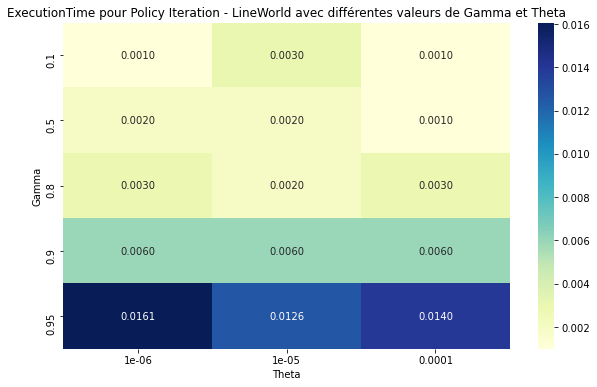

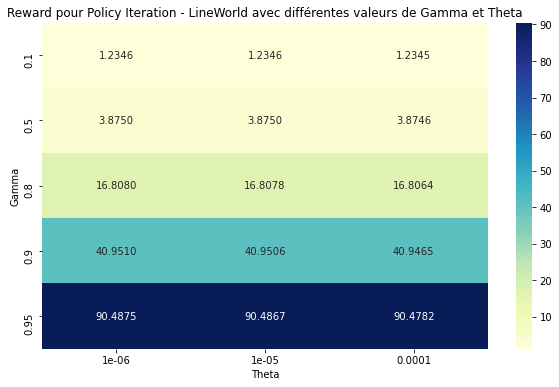

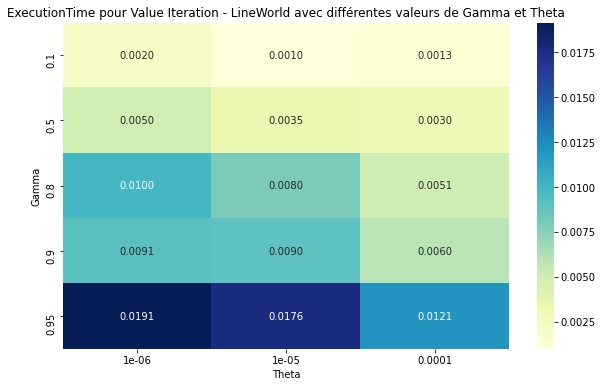

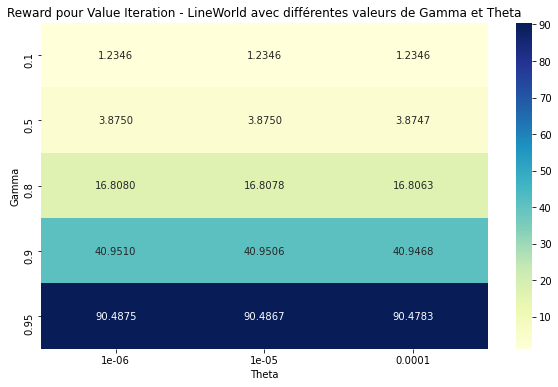

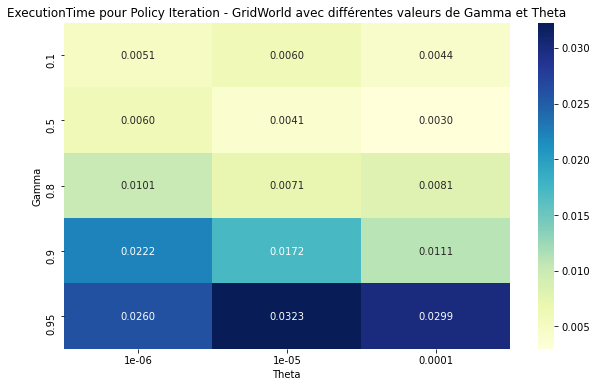

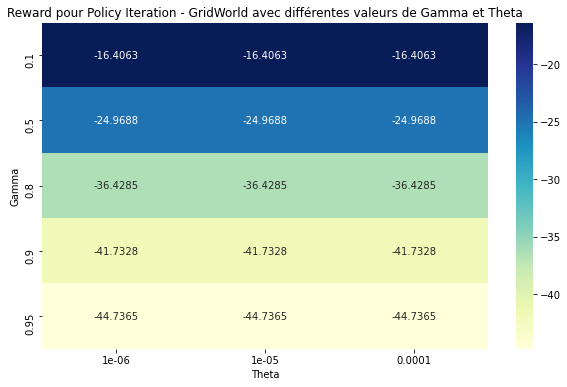

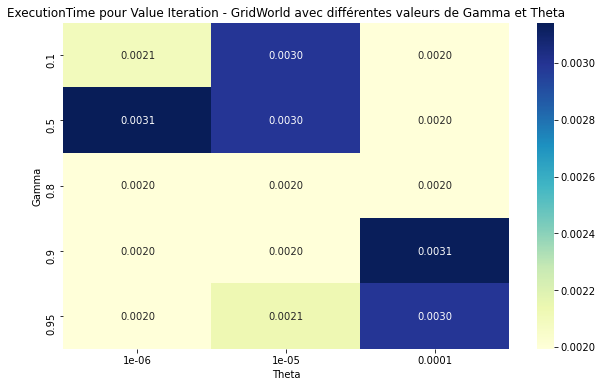

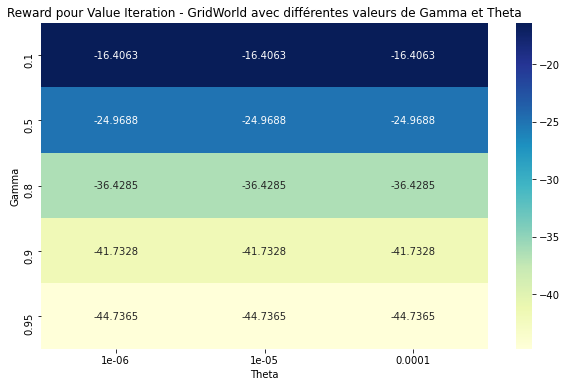

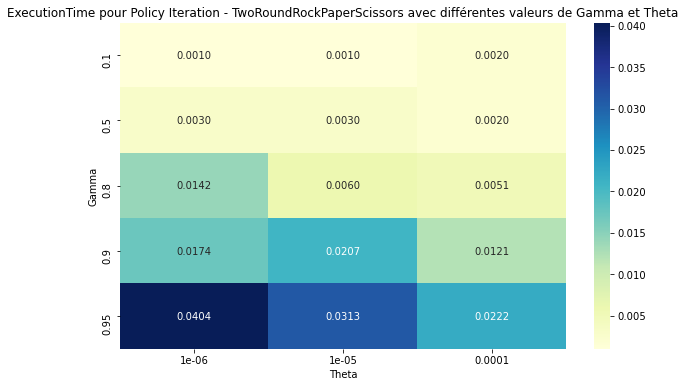

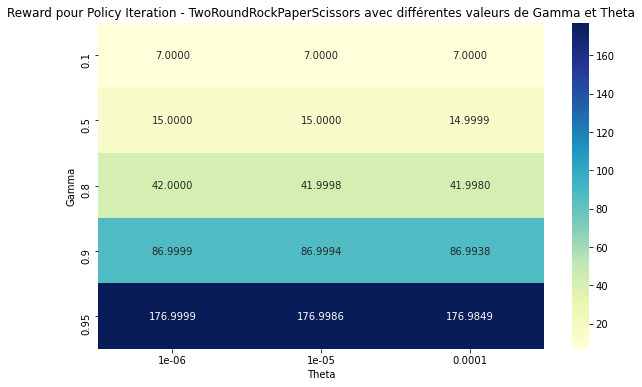

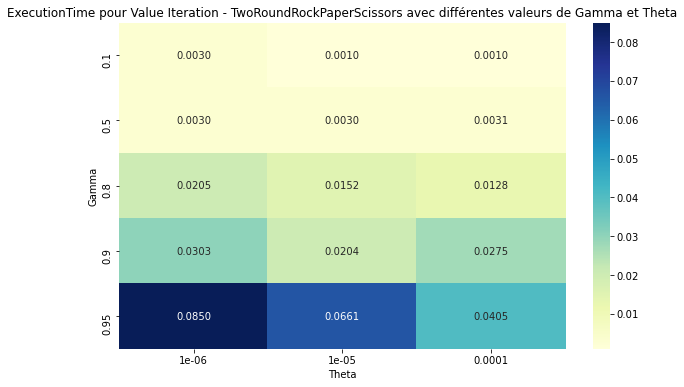

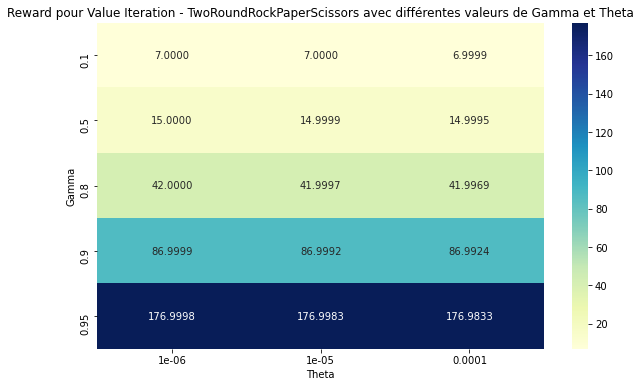

In [32]:
# Fonction de recherche en grille pour Policy Iteration
def grid_search_pi(env, gammas, thetas):
    results = []
    for gamma in gammas:
        for theta in thetas:
            iteration_de_politique = PolicyIteration(env, gamma=gamma, theta=theta)
            politique_optimale, fonction_de_valeur_optimale, exec_time = iteration_de_politique.iterate()
            récompense_optimale = np.sum(fonction_de_valeur_optimale)
            results.append((gamma, theta, exec_time, récompense_optimale))
            print(f"Gamma: {gamma}, Theta: {theta}, Time: {exec_time:.4f} seconds, Reward: {récompense_optimale:.4f}")
    return results

# Fonction de recherche en grille pour Value Iteration
def grid_search_vi(env, gammas, thetas):
    results = []
    for gamma in gammas:
        for theta in thetas:
            iteration_de_valeur = ValueIteration(env, gamma=gamma, theta=theta)
            politique_optimale, fonction_de_valeur_optimale, exec_time = iteration_de_valeur.iterate()
            récompense_optimale = np.sum(fonction_de_valeur_optimale)
            results.append((gamma, theta, exec_time, récompense_optimale))
            print(f"Gamma: {gamma}, Theta: {theta}, Time: {exec_time:.4f} seconds, Reward: {récompense_optimale:.4f}")
    return results

# Fonction pour visualiser les résultats
def plot_results(results, env_name, metric='ExecutionTime'):
    df = pd.DataFrame(results, columns=['Gamma', 'Theta', 'ExecutionTime', 'Reward'])
    pivot_table = df.pivot('Gamma', 'Theta', metric)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
    plt.title(f"{metric} pour {env_name} avec différentes valeurs de Gamma et Theta")
    plt.xlabel("Theta")
    plt.ylabel("Gamma")
    plt.show()

# Initialiser les environnements
line_world = LineWorld()
grid_world = GridWorld()
rps_env = TwoRoundRockPaperScissors()

# Définir les plages de valeurs pour gamma et theta
gammas = [0.1, 0.5, 0.8, 0.9, 0.95]
thetas = [1e-4, 1e-5, 1e-6]

# Effectuer la recherche en grille pour Policy Iteration
results_pi_line_world = grid_search_pi(line_world, gammas, thetas)
results_pi_grid_world = grid_search_pi(grid_world, gammas, thetas)
results_pi_rps = grid_search_pi(rps_env, gammas, thetas)

# Effectuer la recherche en grille pour Value Iteration
results_vi_line_world = grid_search_vi(line_world, gammas, thetas)
results_vi_grid_world = grid_search_vi(grid_world, gammas, thetas)
results_vi_rps = grid_search_vi(rps_env, gammas, thetas)

# Visualiser les résultats pour LineWorld
plot_results(results_pi_line_world, "Policy Iteration - LineWorld", metric='ExecutionTime')
plot_results(results_pi_line_world, "Policy Iteration - LineWorld", metric='Reward')
plot_results(results_vi_line_world, "Value Iteration - LineWorld", metric='ExecutionTime')
plot_results(results_vi_line_world, "Value Iteration - LineWorld", metric='Reward')

# Visualiser les résultats pour GridWorld
plot_results(results_pi_grid_world, "Policy Iteration - GridWorld", metric='ExecutionTime')
plot_results(results_pi_grid_world, "Policy Iteration - GridWorld", metric='Reward')
plot_results(results_vi_grid_world, "Value Iteration - GridWorld", metric='ExecutionTime')
plot_results(results_vi_grid_world, "Value Iteration - GridWorld", metric='Reward')

# Visualiser les résultats pour TwoRoundRockPaperScissors
plot_results(results_pi_rps, "Policy Iteration - TwoRoundRockPaperScissors", metric='ExecutionTime')
plot_results(results_pi_rps, "Policy Iteration - TwoRoundRockPaperScissors", metric='Reward')
plot_results(results_vi_rps, "Value Iteration - TwoRoundRockPaperScissors", metric='ExecutionTime')
plot_results(results_vi_rps, "Value Iteration - TwoRoundRockPaperScissors", metric='Reward')


In [22]:
import numpy as np
import time
import tkinter as tk

class LineWorldWrapper:
    def __init__(self, size=5):
        self.size = size
        self.state = size // 2  # Initialize in the middle
        self.nS = size
        self.nA = 2
        self.P = self._build_transition_probabilities()
    
    def _build_transition_probabilities(self):
        P = {s: {a: [] for a in range(self.nA)} for s in range(self.nS)}
        for s in range(self.nS):
            if s == 0:
                P[s][0] = [(1.0, s, -1, True)]  # stay in place with a penalty
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
            elif s == self.nS - 1:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s, 1, True)]  # stay in place with a reward
            else:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
        return P
    
    def num_states(self):
        return self.nS
    
    def num_actions(self):
        return self.nA
    
    def num_rewards(self):
        return 3  # -1, 0, 1
    
    def reward(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return reward
        return 0.0
    
    def transition_probability(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return prob
        return 0.0
    
    def reset(self):
        self.state = self.size // 2  # Reset in the middle
    
    def display(self):
        line = ['-'] * self.size
        line[self.state] = 'A'
        display_str = ' '.join(line)
        print(display_str)
        return display_str
    
    def state_id(self):
        return self.state
    
    def is_forbidden(self, action):
        return False
    
    def is_game_over(self):
        return self.state == 0 or self.state == self.size - 1
    
    def available_actions(self):
        return np.array([0, 1])
    
    def step(self, action):
        prob, next_state, reward, done = self.P[self.state][action][0]
        self.state = next_state
        return next_state, reward, done
    
    def score(self):
        if self.state == 0:
            return -1
        elif self.state == self.size - 1:
            return 1
        return 0

    @staticmethod
    def from_random_state(size=5):
        env = LineWorldWrapper(size)
        env.state = np.random.randint(0, size)
        return env

class LineWorld:
    def __init__(self, size=5, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = LineWorldWrapper(size)
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.state
        self.instance = instance
        self.P = self.wrapper.P

    def __del__(self):
        pass

    # MDP methods
    def num_states(self) -> int:
        return self.wrapper.num_states()

    def num_actions(self) -> int:
        return self.wrapper.num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.transition_probability(s, a, s_p)
    
    def get_transition_probabilities(self):
        return self.wrapper.P

    # Monte Carlo and TD methods
    def state_id(self) -> int:
        return self.wrapper.state_id()

    def reset(self):
        self.wrapper.reset()

    def display(self):
        return self.wrapper.display()

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.is_forbidden(action)

    def is_game_over(self) -> bool:
        return self.wrapper.is_game_over()

    def available_actions(self) -> np.ndarray:
        return self.wrapper.available_actions()

    def step(self, action: int):
        return self.wrapper.step(action)

    def score(self):
        return self.wrapper.score()

    @staticmethod
    def from_random_state(size=5) -> 'LineWorld':
        wrapper = LineWorldWrapper.from_random_state(size)
        instance = wrapper.state
        return LineWorld(wrapper, instance)

class PolicyIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.policy = np.ones([env.num_states(), env.num_actions()]) / env.num_actions()
        self.value_function = np.zeros(env.num_states())
    
    def policy_evaluation(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                new_value = 0
                for a in range(self.env.num_actions()):
                    for proba, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                        new_value += self.policy[s, a] * proba * (reward + self.gamma * self.value_function[next_state])
                self.value_function[s] = new_value
                delta = max(delta, abs(v - new_value))
            if delta < self.theta:
                break
    
    def policy_improvement(self):
        policy_stable = True
        for s in range(self.env.num_states()):
            old_action = np.argmax(self.policy[s])
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                for proba, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                    action_values[a] += proba * (reward + self.gamma * self.value_function[next_state])
            best_action = np.argmax(action_values)
            self.policy[s] = np.eye(self.env.num_actions())[best_action]
            if old_action != best_action:
                policy_stable = False
        return policy_stable
    
    def iterate(self):
        start_time = time.time()
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                break
        exec_time = time.time() - start_time
        return self.policy, self.value_function, exec_time

class ValueIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.value_function = np.zeros(env.num_states())
        self.policy = np.zeros(env.num_states(), dtype=int)
    
    def value_iteration(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                action_values = np.zeros(self.env.num_actions())
                for a in range(self.env.num_actions()):
                    for prob, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                        action_values[a] += prob * (reward + self.gamma * self.value_function[next_state])
                self.value_function[s] = np.max(action_values)
                delta = max(delta, abs(v - self.value_function[s]))
            if delta < self.theta:
                break
    
    def extract_policy(self):
        for s in range(self.env.num_states()):
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                for prob, next_state, reward, done in self.env.get_transition_probabilities()[s][a]:
                    action_values[a] += prob * (reward + self.gamma * self.value_function[next_state])
            self.policy[s] = np.argmax(action_values)
        return self.policy
    
    def iterate(self):
        start_time = time.time()
        self.value_iteration()
        policy = self.extract_policy()
        exec_time = time.time() - start_time
        return policy, self.value_function, exec_time

def apply_policy_iteration(env):
    pi = PolicyIteration(env)
    optimal_policy, value_function, exec_time = pi.iterate()
    deterministic_policy = np.argmax(optimal_policy, axis=1)
    return deterministic_policy, value_function, exec_time

def apply_value_iteration(env):
    vi = ValueIteration(env)
    optimal_policy, value_function, exec_time = vi.iterate()
    return optimal_policy, value_function, exec_time

class LineWorldGUI:
    def __init__(self, root, env):
        self.root = root
        self.env = env
        self.policy = None
        self.total_reward = 0  # Cumulative reward
        self.actions_taken = []  # Store actions taken

        self.root.title("LineWorld")
        
        self.canvas = tk.Canvas(root, width=400, height=50)
        self.canvas.pack()
        
        self.display_env()

        self.button_left = tk.Button(root, text="Move Left", command=lambda: self.take_action(0))
        self.button_left.pack(side=tk.LEFT)

        self.button_right = tk.Button(root, text="Move Right", command=lambda: self.take_action(1))
        self.button_right.pack(side=tk.LEFT)

        self.button_reset = tk.Button(root, text="Reset", command=self.reset_env)
        self.button_reset.pack(side=tk.LEFT)
        
        self.button_policy_iteration = tk.Button(root, text="Policy Iteration", command=self.apply_policy_iteration)
        self.button_policy_iteration.pack(side=tk.LEFT)
        
        self.button_value_iteration = tk.Button(root, text="Value Iteration", command=self.apply_value_iteration)
        self.button_value_iteration.pack(side=tk.LEFT)
        
        self.button_run_policy = tk.Button(root, text="Run Policy", command=self.run_policy)
        self.button_run_policy.pack(side=tk.LEFT)
        
        self.label_reward = tk.Label(root, text=f"Total Reward: {self.total_reward}")
        self.label_reward.pack(side=tk.BOTTOM)

    def display_env(self):
        self.canvas.delete("all")
        line = self.env.display().split()
        for i, char in enumerate(line):
            color = "red" if char == "A" else "black"
            self.canvas.create_text(50 + i * 30, 25, text=char, fill=color, font=("Helvetica", 24))

    def update_reward_display(self):
        self.label_reward.config(text=f"Total Reward: {self.total_reward}")

    def take_action(self, action):
        next_state, reward, done = self.env.step(action)
        print(f"Action taken: {'Left' if action == 0 else 'Right'}, Reward: {reward}")  # Debug print
        self.total_reward += reward
        self.display_env()
        self.update_reward_display()
        self.actions_taken.append(action)

    def reset_env(self):
        self.env.reset()
        self.total_reward = 0
        self.actions_taken = []
        self.display_env()
        self.update_reward_display()

    def apply_policy_iteration(self):
        self.policy, _, _ = apply_policy_iteration(self.env)
        print("Optimal Policy from Policy Iteration:")
        print(self.policy)

    def apply_value_iteration(self):
        self.policy, _, _ = apply_value_iteration(self.env)
        print("Optimal Policy from Value Iteration:")
        print(self.policy)

    def run_policy(self):
        if self.policy is None:
            print("No policy loaded.")
            return
        self.reset_env()
        self._run_policy_step()

    def _run_policy_step(self):
        if self.env.is_game_over():
            print("Game Over!")
            print(f"Actions taken: {self.actions_taken}")
            return
        state = self.env.state_id()
        action = self.policy[state]  # Select the action with the highest probability
        print(f"State: {state}, Action: {action}")  # Debug print
        next_state, reward, done = self.env.step(action)
        print(f"Reward received: {reward}")  # Debug print
        self.total_reward += reward
        self.display_env()
        self.update_reward_display()
        self.actions_taken.append(action)
        if not self.env.is_game_over():
            self.root.after(1000, self._run_policy_step)
        else:
            print(f"Final Total Reward: {self.total_reward}")
            print(f"Actions taken: {self.actions_taken}")

if __name__ == "__main__":
    root = tk.Tk()
    line_world = LineWorld(size=5)
    app = LineWorldGUI(root, line_world)
    root.mainloop()


- - A - -
No policy loaded.
Optimal Policy from Value Iteration:
[1 1 1 1 1]
- - A - -
State: 2, Action: 1
Reward received: 0
- - - A -
State: 3, Action: 1
Reward received: 0
- - - - A
Final Total Reward: 0
Actions taken: [1, 1]


In [39]:
import numpy as np
import random
import tkinter as tk

# Classe LineWorldWrapper
class LineWorldWrapper:
    def __init__(self, size=5):
        self.size = size
        self.state = size // 2  # Initialize in the middle
        self.nS = size
        self.nA = 2
        self.P = self._build_transition_probabilities()
    
    def _build_transition_probabilities(self):
        P = {s: {a: [] for a in range(self.nA)} for s in range(self.nS)}
        for s in range(self.nS):
            if s == 0:
                P[s][0] = [(1.0, s, -1, True)]  # stay in place with a penalty
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
            elif s == self.nS - 1:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s, 1, True)]  # stay in place with a reward
            else:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
        return P
    
    def num_states(self):
        return self.nS
    
    def num_actions(self):
        return self.nA
    
    def num_rewards(self):
        return 3  # -1, 0, 1
    
    def reward(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return reward
        return 0.0
    
    def transition_probability(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return prob
        return 0.0
    
    def reset(self):
        self.state = self.size // 2  # Reset in the middle
        return self.state
    
    def display(self):
        line = ['-'] * self.size
        line[self.state] = 'A'
        display_str = ' '.join(line)
        print(display_str)
        return display_str
    
    def state_id(self):
        return self.state
    
    def is_forbidden(self, action):
        return False
    
    def is_game_over(self):
        return self.state == 0 or self.state == self.size - 1
    
    def available_actions(self):
        return np.array([0, 1])
    
    def step(self, action):
        prob, next_state, reward, done = self.P[self.state][action][0]
        self.state = next_state
        return next_state, reward, done
    
    def score(self):
        if self.state == 0:
            return -1
        elif self.state == self.size - 1:
            return 1
        return 0

    @staticmethod
    def from_random_state(size=5):
        env = LineWorldWrapper(size)
        env.state = np.random.randint(0, size)
        return env

# Classe LineWorld
class LineWorld:
    def __init__(self, size=5, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = LineWorldWrapper(size)
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.state
        self.instance = instance
        self.P = self.wrapper.P

    def __del__(self):
        pass

    # MDP methods
    def num_states(self) -> int:
        return self.wrapper.num_states()

    def num_actions(self) -> int:
        return self.wrapper.num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.transition_probability(s, a, s_p)
    
    def get_transition_probabilities(self):
        return self.wrapper.P

    # Monte Carlo and TD methods
    def state_id(self) -> int:
        return self.wrapper.state_id()

    def reset(self):
        return self.wrapper.reset()

    def display(self):
        return self.wrapper.display()

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.is_forbidden(action)

    def is_game_over(self) -> bool:
        return self.wrapper.is_game_over()

    def available_actions(self) -> np.ndarray:
        return self.wrapper.available_actions()

    def step(self, action: int):
        return self.wrapper.step(action)

    def score(self):
        return self.wrapper.score()

    @staticmethod
    def from_random_state(size=5) -> 'LineWorld':
        wrapper = LineWorldWrapper.from_random_state(size)
        instance = wrapper.state
        return LineWorld(wrapper, instance)

# Classe PolicyIteration
class PolicyIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.policy = np.ones(env.num_states(), dtype=int)
        self.value_function = np.zeros(env.num_states())
    
    def policy_evaluation(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                a = self.policy[s]
                new_value = sum(
                    prob * (reward + self.gamma * self.value_function[next_state])
                    for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                )
                self.value_function[s] = new_value
                delta = max(delta, abs(v - new_value))
            if delta < self.theta:
                break
    
    def policy_improvement(self):
        policy_stable = True
        for s in range(self.env.num_states()):
            old_action = self.policy[s]
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                action_values[a] = sum(
                    prob * (reward + self.gamma * self.value_function[next_state])
                    for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                )
            best_action = np.argmax(action_values)
            self.policy[s] = best_action
            if old_action != best_action:
                policy_stable = False
        return policy_stable
    
    def iterate(self):
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                break
        return self.policy, self.value_function

# Classe ValueIteration
class ValueIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.value_function = np.zeros(env.num_states())
        self.policy = np.zeros(env.num_states(), dtype=int)
    
    def value_iteration(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                action_values = np.zeros(self.env.num_actions())
                for a in range(self.env.num_actions()):
                    action_values[a] = sum(
                        prob * (reward + self.gamma * self.value_function[next_state])
                        for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                    )
                self.value_function[s] = np.max(action_values)
                delta = max(delta, abs(v - self.value_function[s]))
            if delta < self.theta:
                break
    
    def extract_policy(self):
        for s in range(self.env.num_states()):
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                action_values[a] = sum(
                    prob * (reward + self.gamma * self.value_function[next_state])
                    for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                )
            self.policy[s] = np.argmax(action_values)
        return self.policy
    
    def iterate(self):
        self.value_iteration()
        policy = self.extract_policy()
        return policy, self.value_function

# Classe DynaQ
class DynaQ:
    def __init__(self, env, gamma=0.9, alpha=0.1, epsilon=0.1, planning_steps=10):
        self.env = env
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.planning_steps = planning_steps
        self.q_table = np.zeros((env.num_states(), env.num_actions()))
        self.model = {}
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.num_actions())
        else:
            return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error
        self.model[(state, action)] = (reward, next_state)
    
    def planning(self):
        for _ in range(self.planning_steps):
            (state, action), (reward, next_state) = random.choice(list(self.model.items()))
            self.learn(state, action, reward, next_state)
    
    def train(self, num_episodes):
        for episode in range(num_episodes):
            state = self.env.reset()
            while not self.env.is_game_over():
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.learn(state, action, reward, next_state)
                self.planning()
                state = next_state
        return self.q_table

# Fonctions pour appliquer les algorithmes
def apply_policy_iteration(env):
    pi = PolicyIteration(env)
    optimal_policy, value_function = pi.iterate()
    return optimal_policy, value_function

def apply_value_iteration(env):
    vi = ValueIteration(env)
    optimal_policy, value_function = vi.iterate()
    return optimal_policy, value_function

def apply_dyna_q(env):
    dyna_q = DynaQ(env)
    q_table = dyna_q.train(num_episodes=100)
    optimal_policy = np.argmax(q_table, axis=1)
    return optimal_policy, q_table

# Classe LineWorldGUI
class LineWorldGUI:
    def __init__(self, root, env):
        self.root = root
        self.env = env
        self.policy = None
        self.total_reward = 0
        self.actions_taken = []

        self.root.title("LineWorld")
        
        self.canvas = tk.Canvas(root, width=400, height=50)
        self.canvas.pack()
        
        self.display_env()

        self.button_left = tk.Button(root, text="Move Left", command=lambda: self.take_action(0))
        self.button_left.pack(side=tk.LEFT)

        self.button_right = tk.Button(root, text="Move Right", command=lambda: self.take_action(1))
        self.button_right.pack(side=tk.LEFT)

        self.button_reset = tk.Button(root, text="Reset", command=self.reset_env)
        self.button_reset.pack(side=tk.LEFT)
        
        self.button_policy_iteration = tk.Button(root, text="Policy Iteration", command=self.apply_policy_iteration)
        self.button_policy_iteration.pack(side=tk.LEFT)
        
        self.button_value_iteration = tk.Button(root, text="Value Iteration", command=self.apply_value_iteration)
        self.button_value_iteration.pack(side=tk.LEFT)
        
        self.button_dyna_q = tk.Button(root, text="Dyna-Q", command=self.apply_dyna_q)
        self.button_dyna_q.pack(side=tk.LEFT)
        
        self.button_run_policy = tk.Button(root, text="Run Policy", command=self.run_policy)
        self.button_run_policy.pack(side=tk.LEFT)
        
        self.label_reward = tk.Label(root, text=f"Total Reward: {self.total_reward}")
        self.label_reward.pack(side=tk.BOTTOM)

    def display_env(self):
        self.canvas.delete("all")
        line = self.env.display().split()
        for i, char in enumerate(line):
            color = "red" if char == "A" else "black"
            self.canvas.create_text(50 + i * 30, 25, text=char, fill=color, font=("Helvetica", 24))

    def update_reward_display(self):
        self.label_reward.config(text=f"Total Reward: {self.total_reward}")

    def take_action(self, action):
        next_state, reward, done = self.env.step(action)
        print(f"Action taken: {'Left' if action == 0 else 'Right'}, Reward: {reward}")
        self.total_reward += reward
        self.actions_taken.append(action)
        self.display_env()
        self.update_reward_display()

    def reset_env(self):
        self.env.reset()
        self.total_reward = 0
        self.actions_taken = []
        self.display_env()
        self.update_reward_display()

    def apply_policy_iteration(self):
        self.policy, _ = apply_policy_iteration(self.env)
        print("Optimal Policy from Policy Iteration:")
        print(self.policy)

    def apply_value_iteration(self):
        self.policy, _ = apply_value_iteration(self.env)
        print("Optimal Policy from Value Iteration:")
        print(self.policy)
    
    def apply_dyna_q(self):
        self.policy, _ = apply_dyna_q(self.env)
        print("Optimal Policy from Dyna-Q:")
        print(self.policy)

    def run_policy(self):
        if self.policy is None:
            print("No policy loaded.")
            return
        self.reset_env()
        self._run_policy_step()

    def _run_policy_step(self):
        if self.env.is_game_over():
            print("Game Over!")
            print(f"Actions taken: {self.actions_taken}")
            return
        state = self.env.state_id()
        action = self.policy[state]
        print(f"State: {state}, Action: {action}")
        next_state, reward, done = self.env.step(action)
        print(f"Reward received: {reward}")
        self.total_reward += reward
        self.actions_taken.append(action)
        self.display_env()
        self.update_reward_display()
        if not self.env.is_game_over():
            self.root.after(1000, self._run_policy_step)
        else:
            print(f"Final Total Reward: {self.total_reward}")
            print(f"Actions taken: {self.actions_taken}")

if __name__ == "__main__":
    root = tk.Tk()
    line_world = LineWorld(size=5)
    app = LineWorldGUI(root, line_world)
    root.mainloop()


- - A - -
Optimal Policy from Dyna-Q:
[0 0 0 0 0]
Optimal Policy from Value Iteration:
[1 1 1 1 1]
- - A - -
Optimal Policy from Dyna-Q:
[0 0 0 0 0]
- - A - -
State: 2, Action: 0
Reward received: 0
- A - - -
State: 1, Action: 0
Reward received: 0
A - - - -
Final Total Reward: 0
Actions taken: [0, 0]


In [45]:
import numpy as np
import random
import tkinter as tk

# Classe LineWorldWrapper
class LineWorldWrapper:
    def __init__(self, size=5):
        self.size = size
        self.state = size // 2  # Initialize in the middle
        self.nS = size
        self.nA = 2
        self.P = self._build_transition_probabilities()
    
    def _build_transition_probabilities(self):
        P = {s: {a: [] for a in range(self.nA)} for s in range(self.nS)}
        for s in range(self.nS):
            if s == 0:
                P[s][0] = [(1.0, s, -1, True)]  # stay in place with a penalty
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
            elif s == self.nS - 1:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s, 1, True)]  # stay in place with a reward
            else:
                P[s][0] = [(1.0, s - 1, 0, False)]  # move left
                P[s][1] = [(1.0, s + 1, 0, False)]  # move right
        return P
    
    def num_states(self):
        return self.nS
    
    def num_actions(self):
        return self.nA
    
    def num_rewards(self):
        return 3  # -1, 0, 1
    
    def reward(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return reward
        return 5
    
    def transition_probability(self, state, action, next_state):
        for prob, next_s, reward, done in self.P[state][action]:
            if next_s == next_state:
                return prob
        return 0.0
    
    def reset(self):
        self.state = self.size // 2  # Reset in the middle
        return self.state
    
    def display(self):
        line = ['-'] * self.size
        line[self.state] = 'A'
        display_str = ' '.join(line)
        print(display_str)
        return display_str
    
    def state_id(self):
        return self.state
    
    def is_forbidden(self, action):
        return False
    
    def is_game_over(self):
        return self.state == 0 or self.state == self.size - 1
    
    def available_actions(self):
        return np.array([0, 1])
    
    def step(self, action):
        prob, next_state, reward, done = self.P[self.state][action][0]
        self.state = next_state
        return next_state, reward, done
    
    def score(self):
        if self.state == 0:
            return -1
        elif self.state == self.size - 1:
            return 1
        return 0

    @staticmethod
    def from_random_state(size=5):
        env = LineWorldWrapper(size)
        env.state = np.random.randint(0, size)
        return env

# Classe LineWorld
class LineWorld:
    def __init__(self, size=5, wrapper=None, instance=None):
        if wrapper is None:
            wrapper = LineWorldWrapper(size)
        self.wrapper = wrapper
        if instance is None:
            instance = self.wrapper.state
        self.instance = instance
        self.P = self.wrapper.P

    def __del__(self):
        pass

    # MDP methods
    def num_states(self) -> int:
        return self.wrapper.num_states()

    def num_actions(self) -> int:
        return self.wrapper.num_actions()

    def num_rewards(self) -> int:
        return self.wrapper.num_rewards()

    def reward(self, s: int, a: int, s_p: int) -> float:
        return self.wrapper.reward(s, a, s_p)

    def p(self, s: int, a: int, s_p: int, r_index: int) -> float:
        return self.wrapper.transition_probability(s, a, s_p)
    
    def get_transition_probabilities(self):
        return self.wrapper.P

    # Monte Carlo and TD methods
    def state_id(self) -> int:
        return self.wrapper.state_id()

    def reset(self):
        return self.wrapper.reset()

    def display(self):
        return self.wrapper.display()

    def is_forbidden(self, action: int) -> int:
        return self.wrapper.is_forbidden(action)

    def is_game_over(self) -> bool:
        return self.wrapper.is_game_over()

    def available_actions(self) -> np.ndarray:
        return self.wrapper.available_actions()

    def step(self, action: int):
        return self.wrapper.step(action)

    def score(self):
        return self.wrapper.score()

    @staticmethod
    def from_random_state(size=5) -> 'LineWorld':
        wrapper = LineWorldWrapper.from_random_state(size)
        instance = wrapper.state
        return LineWorld(wrapper, instance)

# Classe PolicyIteration
class PolicyIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.policy = np.ones(env.num_states(), dtype=int)
        self.value_function = np.zeros(env.num_states())
    
    def policy_evaluation(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                a = self.policy[s]
                new_value = sum(
                    prob * (reward + self.gamma * self.value_function[next_state])
                    for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                )
                self.value_function[s] = new_value
                delta = max(delta, abs(v - new_value))
            if delta < self.theta:
                break
    
    def policy_improvement(self):
        policy_stable = True
        for s in range(self.env.num_states()):
            old_action = self.policy[s]
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                action_values[a] = sum(
                    prob * (reward + self.gamma * self.value_function[next_state])
                    for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                )
            best_action = np.argmax(action_values)
            self.policy[s] = best_action
            if old_action != best_action:
                policy_stable = False
        return policy_stable
    
    def iterate(self):
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                break
        return self.policy, self.value_function

# Classe ValueIteration
class ValueIteration:
    def __init__(self, env, gamma=0.9, theta=1e-6):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.value_function = np.zeros(env.num_states())
        self.policy = np.zeros(env.num_states(), dtype=int)
    
    def value_iteration(self):
        while True:
            delta = 0
            for s in range(self.env.num_states()):
                v = self.value_function[s]
                action_values = np.zeros(self.env.num_actions())
                for a in range(self.env.num_actions()):
                    action_values[a] = sum(
                        prob * (reward + self.gamma * self.value_function[next_state])
                        for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                    )
                self.value_function[s] = np.max(action_values)
                delta = max(delta, abs(v - self.value_function[s]))
            if delta < self.theta:
                break
    
    def extract_policy(self):
        for s in range(self.env.num_states()):
            action_values = np.zeros(self.env.num_actions())
            for a in range(self.env.num_actions()):
                action_values[a] = sum(
                    prob * (reward + self.gamma * self.value_function[next_state])
                    for prob, next_state, reward, _ in self.env.get_transition_probabilities()[s][a]
                )
            self.policy[s] = np.argmax(action_values)
        return self.policy
    
    def iterate(self):
        self.value_iteration()
        policy = self.extract_policy()
        return policy, self.value_function

# Classe DynaQ
class DynaQ:
    def __init__(self, env, gamma=0.9, alpha=0.1, epsilon=0.1, planning_steps=10):
        self.env = env
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.planning_steps = planning_steps
        self.q_table = np.zeros((env.num_states(), env.num_actions()))
        self.model = {}
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.num_actions())
        else:
            return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error
        self.model[(state, action)] = (reward, next_state)
        print(f"Updated Q-value for state {state}, action {action}: {self.q_table[state][action]}")  # Debug print
    
    def planning(self):
        for _ in range(self.planning_steps):
            (state, action), (reward, next_state) = random.choice(list(self.model.items()))
            self.learn(state, action, reward, next_state)
    
    def train(self, num_episodes):
        for episode in range(num_episodes):
            state = self.env.reset()
            while not self.env.is_game_over():
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                print(f"Episode {episode}, State {state}, Action {action}, Reward {reward}, Next State {next_state}")  # Debug print
                self.learn(state, action, reward, next_state)
                self.planning()
                state = next_state
        return self.q_table

# Fonctions pour appliquer les algorithmes
def apply_policy_iteration(env):
    pi = PolicyIteration(env)
    optimal_policy, value_function = pi.iterate()
    return optimal_policy, value_function

def apply_value_iteration(env):
    vi = ValueIteration(env)
    optimal_policy, value_function = vi.iterate()
    return optimal_policy, value_function

def apply_dyna_q(env):
    dyna_q = DynaQ(env)
    q_table = dyna_q.train(num_episodes=100)
    optimal_policy = np.argmax(q_table, axis=1)
    return optimal_policy, q_table

# Classe LineWorldGUI
class LineWorldGUI:
    def __init__(self, root, env):
        self.root = root
        self.env = env
        self.policy = None
        self.total_reward = 0
        self.actions_taken = []

        self.root.title("LineWorld")
        
        self.canvas = tk.Canvas(root, width=400, height=50)
        self.canvas.pack()
        
        self.display_env()

        self.button_left = tk.Button(root, text="Move Left", command=lambda: self.take_action(0))
        self.button_left.pack(side=tk.LEFT)

        self.button_right = tk.Button(root, text="Move Right", command=lambda: self.take_action(1))
        self.button_right.pack(side=tk.LEFT)

        self.button_reset = tk.Button(root, text="Reset", command=self.reset_env)
        self.button_reset.pack(side=tk.LEFT)
        
        self.button_policy_iteration = tk.Button(root, text="Policy Iteration", command=self.apply_policy_iteration)
        self.button_policy_iteration.pack(side=tk.LEFT)
        
        self.button_value_iteration = tk.Button(root, text="Value Iteration", command=self.apply_value_iteration)
        self.button_value_iteration.pack(side=tk.LEFT)
        
        self.button_dyna_q = tk.Button(root, text="Dyna-Q", command=self.apply_dyna_q)
        self.button_dyna_q.pack(side=tk.LEFT)
        
        self.button_run_policy = tk.Button(root, text="Run Policy", command=self.run_policy)
        self.button_run_policy.pack(side=tk.LEFT)
        
        self.label_reward = tk.Label(root, text=f"Total Reward: {self.total_reward}")
        self.label_reward.pack(side=tk.BOTTOM)

    def display_env(self):
        self.canvas.delete("all")
        line = self.env.display().split()
        for i, char in enumerate(line):
            color = "red" if char == "A" else "black"
            self.canvas.create_text(50 + i * 30, 25, text=char, fill=color, font=("Helvetica", 24))

    def update_reward_display(self):
        self.label_reward.config(text=f"Total Reward: {self.total_reward}")

    def take_action(self, action):
        next_state, reward, done = self.env.step(action)
        print(f"Action taken: {'Left' if action == 0 else 'Right'}, Reward: {reward}")
        self.total_reward += reward
        self.actions_taken.append(action)
        self.display_env()
        self.update_reward_display()

    def reset_env(self):
        self.env.reset()
        self.total_reward = 0
        self.actions_taken = []
        self.display_env()
        self.update_reward_display()

    def apply_policy_iteration(self):
        self.policy, _ = apply_policy_iteration(self.env)
        print("Optimal Policy from Policy Iteration:")
        print(self.policy)

    def apply_value_iteration(self):
        self.policy, _ = apply_value_iteration(self.env)
        print("Optimal Policy from Value Iteration:")
        print(self.policy)
    
    def apply_dyna_q(self):
        self.policy, _ = apply_dyna_q(self.env)
        print("Optimal Policy from Dyna-Q:")
        print(self.policy)

    def run_policy(self):
        if self.policy is None:
            print("No policy loaded.")
            return
        self.reset_env()
        self._run_policy_step()

    def _run_policy_step(self):
        if self.env.is_game_over():
            print("Game Over!")
            print(f"Actions taken: {self.actions_taken}")
            return
        state = self.env.state_id()
        action = self.policy[state]
        print(f"State: {state}, Action: {action}")
        next_state, reward, done = self.env.step(action)
        print(f"Reward received: {reward}")
        self.total_reward += reward
        self.actions_taken.append(action)
        self.display_env()
        self.update_reward_display()
        if not self.env.is_game_over():
            self.root.after(1000, self._run_policy_step)
        else:
            print(f"Final Total Reward: {self.total_reward}")
            print(f"Actions taken: {self.actions_taken}")

if __name__ == "__main__":
    root = tk.Tk()
    line_world = LineWorld(size=5)
    app = LineWorldGUI(root, line_world)
    root.mainloop()


- - A - -
Optimal Policy from Policy Iteration:
[1 1 1 1 1]
- - A - -
State: 2, Action: 1
Reward received: 0
- - - A -
State: 3, Action: 1
Reward received: 0
- - - - A
Final Total Reward: 0
Actions taken: [1, 1]
